In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nbformat
df = pd.read_csv('train.csv') 

# Splitting the dataset into training and testing sets
X = df.drop('price_range', axis=1)  # Features
y = df['price_range']  # Target variable

# Split the data - 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy,conf_matrix, class_report



(0.8925,
 array([[101,   4,   0,   0],
        [  5,  79,   7,   0],
        [  0,   6,  80,   6],
        [  0,   0,  15,  97]]),
 '              precision    recall  f1-score   support\n\n           0       0.95      0.96      0.96       105\n           1       0.89      0.87      0.88        91\n           2       0.78      0.87      0.82        92\n           3       0.94      0.87      0.90       112\n\n    accuracy                           0.89       400\n   macro avg       0.89      0.89      0.89       400\nweighted avg       0.90      0.89      0.89       400\n')

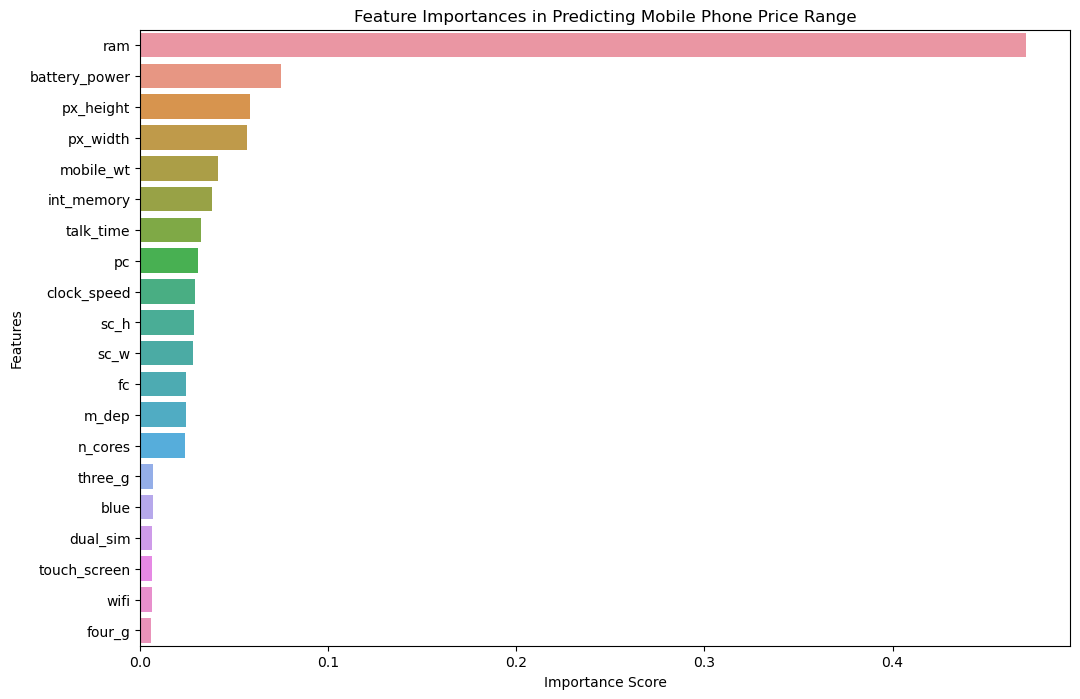

In [6]:

# Extracting feature importances from the model
feature_importances = rf_classifier.feature_importances_

# Creating a pandas series to hold the feature names and their importance scores
features = pd.Series(feature_importances, index=X.columns)

# Sorting the features by their importance
sorted_features = features.sort_values(ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_features, y=sorted_features.index)
plt.title('Feature Importances in Predicting Mobile Phone Price Range')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [11]:
# Examining the unique values and their counts in the 'price_range' column
price_range_unique_values = df['price_range'].value_counts()

price_range_unique_values


price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

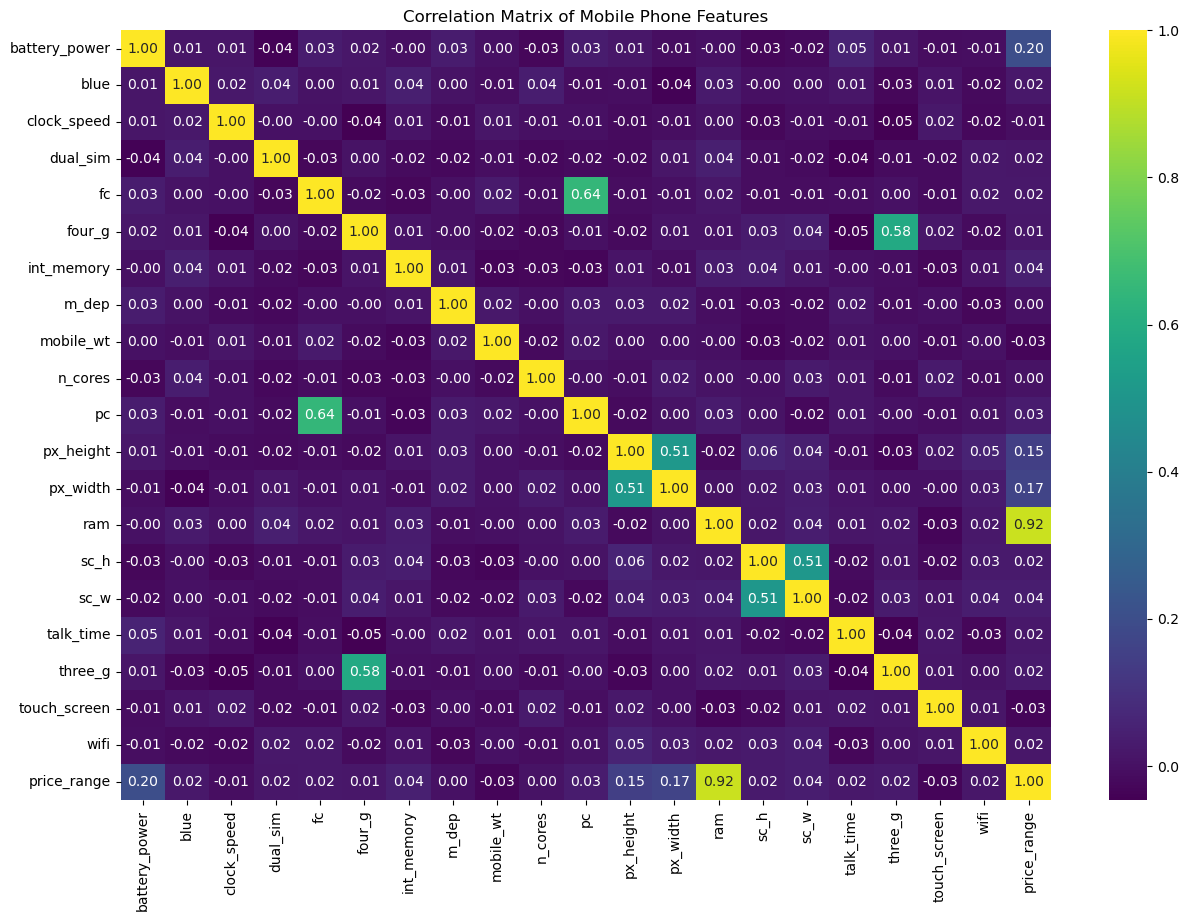

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix to understand the relationships between features
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title("Correlation Matrix of Mobile Phone Features")
plt.show()
